In [32]:
import os
import json
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
import multiprocessing

In [35]:
def get_statistic_value(lst):
    return {
        'mean': np.mean(lst),
        'median': np.median(lst),
        'max': np.max(lst),
        'min': np.min(lst),
        'std': np.std(lst),
        'count': len(lst)
    }

# Analysis result

In [33]:
volume_file = "./statistic/statistic.json"

## Overview

In [34]:
with open(volume_file, 'r') as f:
    volume_rs= json.load(f) 
print(volume_rs)
print(volume_rs.keys())

{'python': {'volumn': 9893858, 'raw_volumn': 39221539, 'none_docstring': 23836205, 'all_identifier': 9893858, 'unique_identifier': 3423694, 'all_code_tokens': 1057084688, 'unique_code_tokens': 22050020, 'all_docstring_tokens': 231998779, 'unique_docstring_tokens': 1633062, 'all_short_docstring_tokens': 121206471, 'unique_short_docstring_tokens': 1049227}, 'php': {'volumn': 5455989, 'raw_volumn': 30323578, 'none_docstring': 14858050, 'all_identifier': 5455989, 'unique_identifier': 1133437, 'all_code_tokens': 612678110, 'unique_code_tokens': 11203393, 'all_docstring_tokens': 96708057, 'unique_docstring_tokens': 715546, 'all_short_docstring_tokens': 54882622, 'unique_short_docstring_tokens': 527605}, 'javascript': {'volumn': 2562158, 'raw_volumn': 33015657, 'none_docstring': 25917797, 'all_identifier': 2562158, 'unique_identifier': 753399, 'all_code_tokens': 322892010, 'unique_code_tokens': 4895923, 'all_docstring_tokens': 64200293, 'unique_docstring_tokens': 501750, 'all_short_docstring_

In [35]:
full_raw= sum([volume_rs[x]['raw_volumn'] for x in volume_rs])
full_none_docstring = sum([volume_rs[x]['none_docstring'] for x in volume_rs])
print("Full raw:", full_raw)
print("Full none_docstring:", full_none_docstring)
print(full_none_docstring/full_raw)

Full raw: 286894618
Full none_docstring: 205151985
0.7150778443672303


In [36]:
PL_match_name = {
    'python': 'Python',
    'java': 'Java',
    'javascript': 'JavaScript',
    'php': 'PHP',
    'c_sharp': 'C#',
    'c': 'C',
    'rust': 'Rust',
    'ruby': 'Ruby',
    'cpp': 'C++',
    'go': 'Go'
}

## Volume

In [6]:
total_volume = sum([volume_rs[x]['volumn'] for x in volume_rs])
total_raw_volume = sum([volume_rs[x]['raw_volumn'] for x in volume_rs])
print(json.dumps(volume_rs, indent= 4))
print(total_volume, total_raw_volume)

{
    "python": {
        "volumn": 9893858,
        "raw_volumn": 39221539,
        "none_docstring": 23836205,
        "all_identifier": 9893858,
        "unique_identifier": 3423694,
        "all_code_tokens": 1057084688,
        "unique_code_tokens": 22050020,
        "all_docstring_tokens": 231998779,
        "unique_docstring_tokens": 1633062,
        "all_short_docstring_tokens": 121206471,
        "unique_short_docstring_tokens": 1049227
    },
    "php": {
        "volumn": 5455989,
        "raw_volumn": 30323578,
        "none_docstring": 14858050,
        "all_identifier": 5455989,
        "unique_identifier": 1133437,
        "all_code_tokens": 612678110,
        "unique_code_tokens": 11203393,
        "all_docstring_tokens": 96708057,
        "unique_docstring_tokens": 715546,
        "all_short_docstring_tokens": 54882622,
        "unique_short_docstring_tokens": 527605
    },
    "javascript": {
        "volumn": 2562158,
        "raw_volumn": 33015657,
        "none_doc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


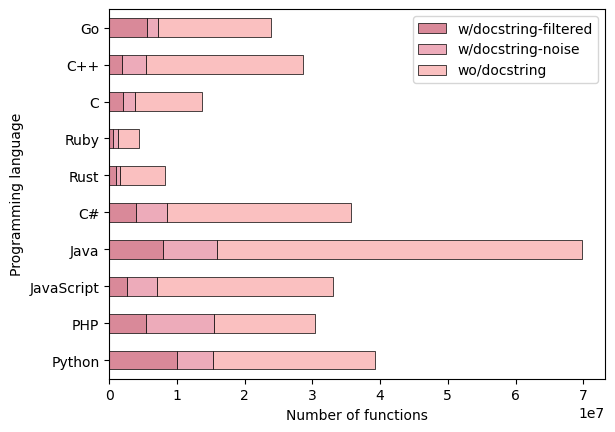

In [7]:
volumn = []
colors = []
for language in volume_rs:
    v = [PL_match_name[language], volume_rs[language]['volumn'], volume_rs[language]['raw_volumn']- volume_rs[language]['none_docstring'] - volume_rs[language]['volumn'], volume_rs[language]['none_docstring']]
    volumn.append(v)
    colors.extend(['#D98999', '#EDABBA', '#FAC0C0'])


df  = pd.DataFrame(volumn, columns=["Programming language", 'w/docstring-filtered', 'w/docstring-noise', 'wo/docstring'])
df.plot(
    x = 'Programming language',
    kind = 'barh',
    stacked = True,
    mark_right = True,
    color=colors,
    edgecolor= "black", linewidth =0.5)

plt.xlabel("Number of functions")
plt.savefig('func_wdoc.eps', format='eps')  

/tmp/ipykernel_1465432/4139000173.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0,0),0.2,color='black', fc='white',linewidth=1, edgecolor='#3D3B37')


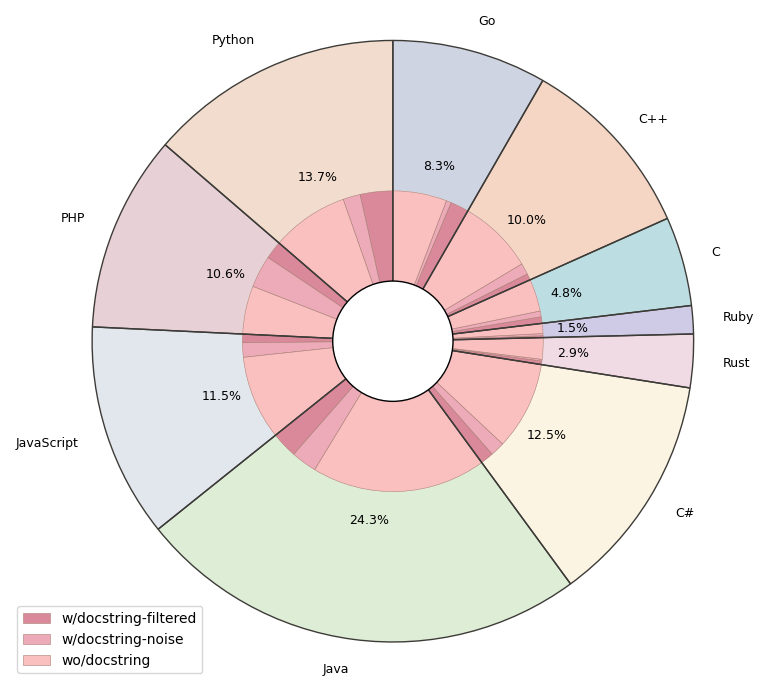

In [90]:
import matplotlib.pyplot as plt
# Pie chart
plt.rcParams["figure.figsize"] = (8,7)
labels = []
sizes = []

labels_documentation = []
sizes_doc = []
colors_doc = []
colors = ['#F1DCCD', '#E8D0D7', '#E2E7EE', '#DEEDD5', '#FCF4E3', '#F0DAE3', '#CFCAE6', '#BCDEE3', '#F5D6C4', '#CED4E2']
for i, language in enumerate(volume_rs.keys()):
    labels.append(PL_match_name[language])
    sizes.append(volume_rs[language]['raw_volumn'])
    labels_documentation.extend(['w/docstring-filtered', 'w/docstring-noise', 'wo/docstring'])
    colors_doc.extend(['#D98999', '#EDABBA', '#FAC0C0'])
    sizes_doc.extend([volume_rs[language]['volumn'], volume_rs[language]['raw_volumn']- volume_rs[language]['none_docstring'] - volume_rs[language]['volumn'], volume_rs[language]['none_docstring']])

explode = [0.2] * len(labels)
explode_doc = [0.1] * len(labels_documentation)
# fig1, ax1 = plt.subplots()
size_ = 0.5
plt.pie(sizes, colors = colors, labels=labels, startangle=90, frame=True, autopct='%1.1f%%', radius=1, wedgeprops=dict(width=size_, edgecolor='w',linewidth =0.4), textprops={'fontsize': 9}, labeldistance=1.1)

patches = plt.pie(sizes_doc, colors=colors_doc, startangle=90, radius=1-size_, wedgeprops=dict(width=1-size_, edgecolor='#A87D71', linewidth =0.4))

plt.pie(sizes, colors = ['#FF000000'] * len(labels), startangle=90, frame=True, radius=1, wedgeprops=dict(width=1, edgecolor='#3D3B37'))

hatches = [".", "///", "XX"] * (len(patches[0]) //3)
plt.legend(patches[0], labels_documentation[:3], loc="lower left")


# Draw circle
centre_circle = plt.Circle((0,0),0.2,color='black', fc='white',linewidth=1, edgecolor='#3D3B37')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  
plt.tight_layout()
# plt.show()
# plt.savefig('pie_volume.eps', format='eps', bbox_inches="tight") 

/tmp/ipykernel_2874815/3752564742.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0,0),0.2,color='black', fc='white',linewidth=0.4, edgecolor='#3D3B37')


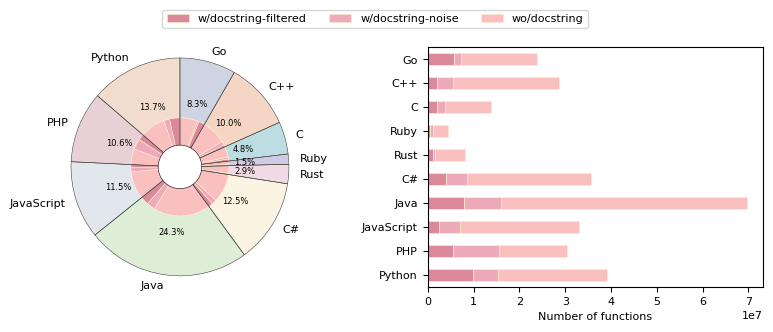

In [37]:
font_size = 8
plt.rcParams.update({'font.size': font_size})
fig, axs = plt.subplots(1,2,figsize=(8,3))

labels = []
sizes = []

labels_documentation = []
sizes_doc = []
colors_doc = []
colors = ['#F1DCCD', '#E8D0D7', '#E2E7EE', '#DEEDD5', '#FCF4E3', '#F0DAE3', '#CFCAE6', '#BCDEE3', '#F5D6C4', '#CED4E2']
inside_colors = ['#D98999', '#EDABBA', '#FAC0C0']
# colors= ["#f9a404", "#fbd75c", "#639cb5", "#7da19d", "#d4cdb3", "#e3d494", "#51b47f", "#b8dfb6", "#d4ecfc", "#f09f72"]
# inside_colors = ['#ffed86', '#a2dce7', '#6dc1ff']
for i, language in enumerate(volume_rs.keys()):
    labels.append(PL_match_name[language])
    sizes.append(volume_rs[language]['raw_volumn'])
    labels_documentation.extend(['w/docstring-filtered', 'w/docstring-noise', 'wo/docstring'])
    colors_doc.extend(inside_colors)
    # colors_doc.extend(['#ffb3e6']*3)
    sizes_doc.extend([volume_rs[language]['volumn'], volume_rs[language]['raw_volumn']- volume_rs[language]['none_docstring'] - volume_rs[language]['volumn'], volume_rs[language]['none_docstring']])

explode = [0.2] * len(labels)
explode_doc = [0.1] * len(labels_documentation)
size_ = 0.55
axs[0].pie(sizes, colors = colors, startangle=90, frame=True, autopct='%1.1f%%', radius=1, wedgeprops=dict(width=size_, edgecolor='w',linewidth =0.4), textprops={'fontsize': font_size-2}, labeldistance=1.1)

patches = axs[0].pie(sizes_doc, colors=colors_doc, startangle=90, radius=1-size_, wedgeprops=dict(width=1-size_, edgecolor='#FFEBCC', linewidth =0.4))

axs[0].pie(sizes, colors = ['#FF000000'] * len(labels), labels=labels, startangle=90, frame=True, radius=1, wedgeprops=dict(width=1, edgecolor='#3D3B37', linewidth =0.4))

# Draw circle
centre_circle = plt.Circle((0,0),0.2,color='black', fc='white',linewidth=0.4, edgecolor='#3D3B37')

axs[0].add_patch( centre_circle )
axs[0].axis('equal')

#############################################
volumn = []
colors = []
for language in volume_rs:
    v = [PL_match_name[language], volume_rs[language]['volumn'], volume_rs[language]['raw_volumn']- volume_rs[language]['none_docstring'] - volume_rs[language]['volumn'], volume_rs[language]['none_docstring']]
    volumn.append(v)
    colors.extend(inside_colors)

df  = pd.DataFrame(volumn, columns=["Programming language", 'w/docstring-filtered', 'w/docstring-noise', 'wo/docstring'])
df.plot(
    ax= axs[1],
    x = 'Programming language',
    kind = 'barh',
    stacked = True,
    mark_right = True,
    color=colors,
    edgecolor= "#FFEBCC", linewidth =0.5, 
    legend= False)

axs[1].set_xlabel("Number of functions")
axs[1].set_ylabel(None)

fig.legend(patches[0], labels_documentation[:3], loc="upper center", fontsize=font_size, ncol= 3, bbox_to_anchor=(0.5, 1.1),)


fig.tight_layout()
# plt.savefig('pie_bar_volume.eps', format='eps', bbox_inches="tight") 

## Docstring statistic

In [3]:
with open("docattr.json", 'r') as f:
    dis = json.load(f)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


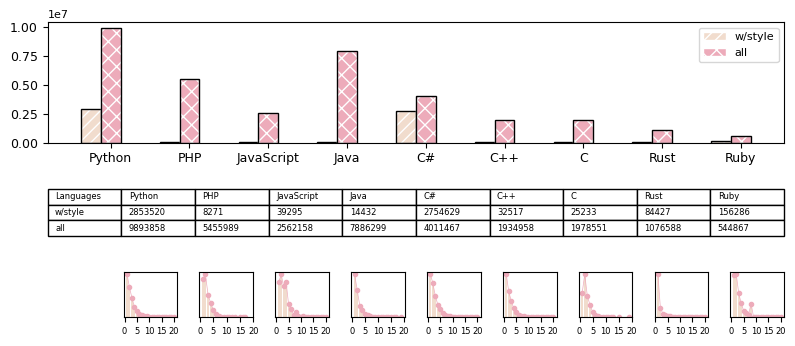

In [41]:
#Document with parameters
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
doc_w_style = {
    'Python': (2853520, 9893858),
    'PHP': (8271, 5455989),
    'JavaScript': (39295, 2562158),
    'Java': (14432, 7886299),
    'C#': (2754629, 4011467),
    'C++': (32517, 1934958),
    'C': (25233, 1978551),
    'Rust': (84427, 1076588),
    'Ruby': (156286, 544867),
}

languages = list(doc_w_style.keys())
data = {"w/style": [doc_w_style[x][0] for x in doc_w_style], "all": [doc_w_style[x][1] for x in doc_w_style]}

x = np.arange(len(languages))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
colors = ['#F1DCCD', '#EDABBA']
# colors = ['#ffcf3d', '#007fc8']
hatches= ["///", "xx"]

gs = gridspec.GridSpec(3, 10, height_ratios = (4,2,1.5))

fig = pl.figure(figsize=(8,3.5))
ax = pl.subplot(gs[0, :]) # row 0, col 0
for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = colors[multiplier], hatch=hatches[multiplier], edgecolor='white')
    pl.bar(x + offset, measurement, width, color = 'none', edgecolor='k')
    # ax.bar_label(rects, padding=3)
    multiplier += 1
pl.xticks(x + width, languages, fontsize=9)
pl.yticks(fontsize=9)
pl.legend(loc='upper right')

ax = pl.subplot(gs[1, :])
pl.axis('off')
tab = pl.table(cellText=[["Languages"] + languages, ["w/style"] + data['w/style'], ["all"] + data['all']], loc='lower center', cellLoc='left')
tab.set_fontsize(9)


languages = ['Python', 'PHP', 'JavaScript', 'Java', 'C_Sharp', "Cpp", "C", 'Rust', 'Ruby']
for lang_id, lang in enumerate(languages):

     data = np.array(dis[lang.lower()])
     data = data[data <= 20]
     data = Counter(data)
     labels, values = zip(*sorted(data.items(), key= lambda x: x[0]))
     
     ax = pl.subplot(gs[2, lang_id+1])
     pl.bar(labels, values, color= '#F1DCCD')
     pl.plot(labels, values, color= '#EDABBA', linewidth=0.5, marker=".")
     pl.xticks(range(0,21,5), fontsize= 6)
     pl.yticks([])

fig.tight_layout()
# plt.show()
plt.savefig("doc_w_style.eps", format='eps')

# Distribution per lang

In [9]:
with open('lang_distribution.json', 'r') as f:
    dis = json.load(f)

In [10]:
dis.keys()

dict_keys(['python', 'php', 'javascript', 'java', 'c_sharp', 'rust', 'ruby', 'c', 'cpp', 'go'])

In [4]:
dis['python'].keys()

dict_keys(['distribution_identifier', 'distribution_code_tokens', 'distribution_docstring_tokens', 'distribution_short_docstring_tokens', 'distribution_docstring_attributes'])

In [20]:
dis['python']['distribution_docstring_attributes'][:10]

[2, 1, 2, 3, 2, 4, 3, 5, 2, 3]

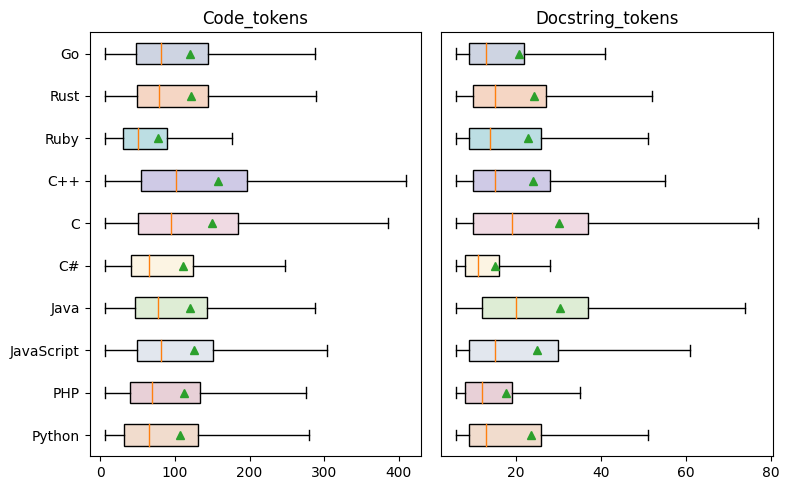

In [11]:
features = ['Code_tokens', 'Docstring_tokens']
languages = ['Python', 'PHP', 'JavaScript', 'Java', 'C_Sharp', "C", "Cpp", 'Ruby', 'Rust', 'Go']
language_title = ['Python', 'PHP', 'JavaScript', 'Java', 'C#', "C", "C++", 'Ruby', 'Rust', 'Go']

# print(D)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
bplots = []
for i, feature in enumerate(features):
     data = []
     for lang in languages:
          data.append(dis[lang.lower()]['distribution_' + feature.lower()])

     bplot = axs[i].boxplot(data, showmeans=True, showfliers=False, vert=False, patch_artist=True)
     bplots.append(bplot)
     axs[i].set_title('{}'.format(feature))

     if i == 0:
          axs[i].set_yticklabels(language_title)
     else:
          axs[i].set_yticks([])

colors = ['#F1DCCD', '#E8D0D7', '#E2E7EE', '#DEEDD5', '#FCF4E3', '#F0DAE3', '#CFCAE6', '#BCDEE3', '#F5D6C4', '#CED4E2']
for bplot in bplots:
     for patch, color in zip(bplot['boxes'], colors):
          patch.set_facecolor(color)

fig.tight_layout()
# plt.show()
fig.savefig("Token.eps", format='eps')

In [23]:
print(Counter(dis['python']['distribution_docstring_attributes']))

Counter({1: 2976216, 2: 2819498, 3: 1699718, 4: 926654, 5: 495735, 0: 366196, 6: 274300, 7: 165879, 8: 105522, 9: 68558, 10: 44690, 11: 31216, 12: 22530, 13: 14907, 14: 10496, 15: 7814, 16: 5794, 17: 4219, 18: 3157, 19: 2397, 20: 1870, 21: 1514, 22: 1216, 23: 906, 24: 655, 25: 613, 26: 498, 27: 391, 28: 334, 29: 291, 30: 281, 31: 207, 32: 146, 33: 135, 35: 111, 34: 110, 36: 95, 37: 77, 38: 72, 40: 63, 41: 54, 39: 45, 46: 43, 43: 39, 42: 38, 45: 36, 49: 32, 44: 28, 50: 24, 51: 24, 52: 19, 47: 19, 48: 17, 53: 17, 55: 14, 83: 10, 56: 10, 54: 10, 67: 10, 61: 8, 57: 6, 80: 6, 63: 5, 71: 5, 59: 4, 60: 4, 62: 4, 76: 4, 64: 4, 58: 4, 66: 4, 95: 3, 74: 3, 69: 3, 79: 3, 72: 3, 78: 3, 73: 3, 108: 3, 99: 3, 75: 3, 87: 2, 77: 2, 100: 2, 101: 2, 96: 2, 70: 2, 65: 2, 113: 1, 222: 1, 116: 1, 109: 1, 146: 1, 111: 1, 178: 1, 89: 1, 84: 1, 88: 1, 94: 1, 104: 1, 86: 1, 112: 1, 103: 1, 119: 1, 157: 1})


In [ ]:

unique_token = {'docstring_tokens': set(), 'code_tokens': set(), 'identifier': set(), 'short_docstring_tokens': set()}

for lang in PL_match_name:
    with open(f"{lang}_token.json", 'r') as f:
        data = json.load(f)
        for key in data:
            unique_token[key] = unique_token[key].union(set(data[key]))

In [15]:
for key in unique_token:
    print(key, len(set(unique_token[key])))

docstring_tokens 7351960
code_tokens 73077761
identifier 12869338
short_docstring_tokens 3695302
